<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/1.%20Introduction%20to%20TensorFlow%20for%20Artificial%20Intelligence%2C%20Machine%20Learning%2C%20and%20Deep%20Learning/week_3/week_3_notebook1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving Computer Vision Accuracy using Convolutions

In [4]:
# 저번 시간 DNN 코드 복습, 성능 확인 
import tensorflow as tf 
mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_imgs, train_labels, epochs=5)

test_loss = model.evaluate(test_imgs, test_labels)
# 정확도 87 ~ 88%
# train set에 비해 test set에서 낮은 정확도를 보임

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6370 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3843 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3421 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8825
Epoch 5/5
313/313 [==============================] - 0s 933us/step - loss: 0.3513 - accuracy: 0.8736


#Convolutional Neural Networks

convolution before dense layer
> more focused imformation will go to dense layer (something like filter on image processing) 

In [10]:
import tensorflow as tf 
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

# why reshape?
# first convolution expects a single tensor containing everything
# so instead of 60,000 28x28x1 items in a list, a single 4D list that is 60,000x28x28x1
train_imgs = train_imgs.reshape(60000, 28, 28, 1)   
train_imgs = train_imgs / 255.0
test_imgs = test_imgs.reshape(10000, 28, 28, 1)
test_imgs = test_imgs / 255.0

model = tf.keras.Sequential(
     # convolution(filter) 개수: 64개 / convolution size: 3*3 / 첫번째 레이어의 경우 input shape까지 
    [tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)), 
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()   # network의 size와 shape 출력 
model.fit(train_imgs, train_labels, epochs=5)
test_loss = model.evaluate(test_imgs, test_labels)


2.4.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_12 (Dense)             (None, 10)         

DNN에 비해 정확도 상승 (90 ~ 92%)

epoch 필요 이상으로 늘릴 경우 overfitting 발생할 수 있음


overfitting은 네트워크가 training set의 데이터에만 특정되게 학습하여 다음 데이터에서 낮은 효율성을 보이는 경우를 뜻 함 

# Visualizing the Convolutions and Pooling



In [11]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


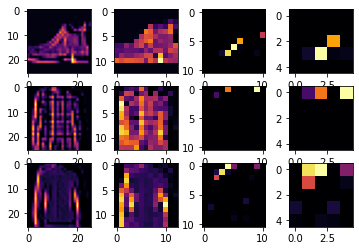

In [16]:
import matplotlib.pyplot as plt 
f, axarr = plt.subplots(3, 4)
first_img = 0
second_img = 7
third_img = 26
convolution_number = 32

# 기존의 모델 생성과는 다른 방법 
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_imgs[first_img].reshape(1, 28, 28, 1))[x]
  axarr[0, x].imshow(f1[0, : , :, convolution_number], cmap='inferno')
  axarr[0, x].grid(False)

  f2 = activation_model.predict(test_imgs[second_img].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, : , :, convolution_number], cmap='inferno')
  axarr[0, x].grid(False)

  f3 = activation_model.predict(test_imgs[third_img].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, : , : , convolution_number], cmap='inferno')
  axarr[2, x].grid(False)



# exercise 

기존 정확도 98%, epoch당 35초 소요 

1. convolution 개수 수정
  
   : 64로 늘린 경우 epoch당 53초 소요, train set에서는 보다 더 높은 정확도가 나오지만 test는 별 차이 없음 (overfitting 된 것으로 추정)  
   : 1로 줄인 경우 epoch 당 15초 소요, 정확도 97%로 낮음 


2. final convolution 제거
   
   : 현재도 컨볼루션 레이어는 하나밖에 없는데?


3. convolution 추가 

  : 32짜리 convolution 하나 더 추가했을 때(pooling도) 10초 정도 더 걸림, 정확도 큰 차이 없음 (이미지가 단순하기 때문이지 않을까)  


4. 첫번째 컨볼루션 빼고 삭제 


5. 콜백 추가

pooling layer도 convolution layer로 봐야하는가?


In [14]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.99:
      print('\nReached 99% of accuracy')
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.0
Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3293 - accuracy: 0.8974
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0311 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0236 - accuracy: 0.9927

Reached 99% of accuracy
313/313 [==============================] - 3s 8ms/step - loss: 0.0329 - accuracy: 0.9886
0.9886000156402588
